In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("netflix_titles.csv")

In [8]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
show_id         7787 non-null object
type            7787 non-null object
title           7787 non-null object
director        5398 non-null object
cast            7069 non-null object
country         7280 non-null object
date_added      7777 non-null object
release_year    7787 non-null int64
rating          7780 non-null object
duration        7787 non-null object
listed_in       7787 non-null object
description     7787 non-null object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


# How many production is there per country?

In [10]:
def divide_and_append(curr_entry, position, list_of_entries):
    arr_of_countries = curr_entry.split(",")
    for i, country in enumerate(arr_of_countries):
        list_of_entries.insert(position + i, country.strip())
        
        
def get_list(attribute_name, data=data):
    list_of_entries = list(data.dropna(subset=[attribute_name])[attribute_name])
    for index, curr_entry in enumerate(list_of_entries):
        if len(curr_entry.split(",")) == 1:
            continue
        else:
            list_of_entries.remove(curr_entry)
            divide_and_append(curr_entry, index, list_of_entries)
    return list_of_entries


def get_freq_list_of(list_of_entries, attribute_name):
    unique, counts = np.unique(np.array(list_of_entries), return_counts=True)
    list_of_entries = np.asarray((unique, counts)).T
    list_of_entries = np.delete(list_of_entries, 0,0)
    df = pd.DataFrame(data=list_of_entries[:,:], columns=[attribute_name, "Frequency"])
    df["Frequency"] = df["Frequency"].astype(int)
    df = df.sort_values(by = ['Frequency'], ascending = False)
    df.reset_index(inplace=True, drop=True)
    return df


def draw_barplot(attribute_title, data):
    sns.set(style="whitegrid")
    sns.set(rc={'figure.figsize':(20,15)})
    sns.barplot(x="Frequency", y=attribute_title, data=data, orient="h")

,Country,Frequency
0,United States,3297
1,India,990
2,United Kingdom,723
3,Canada,412
4,France,349
5,Japan,287
6,Spain,215
7,South Korea,212
8,Germany,199
9,Mexico,154


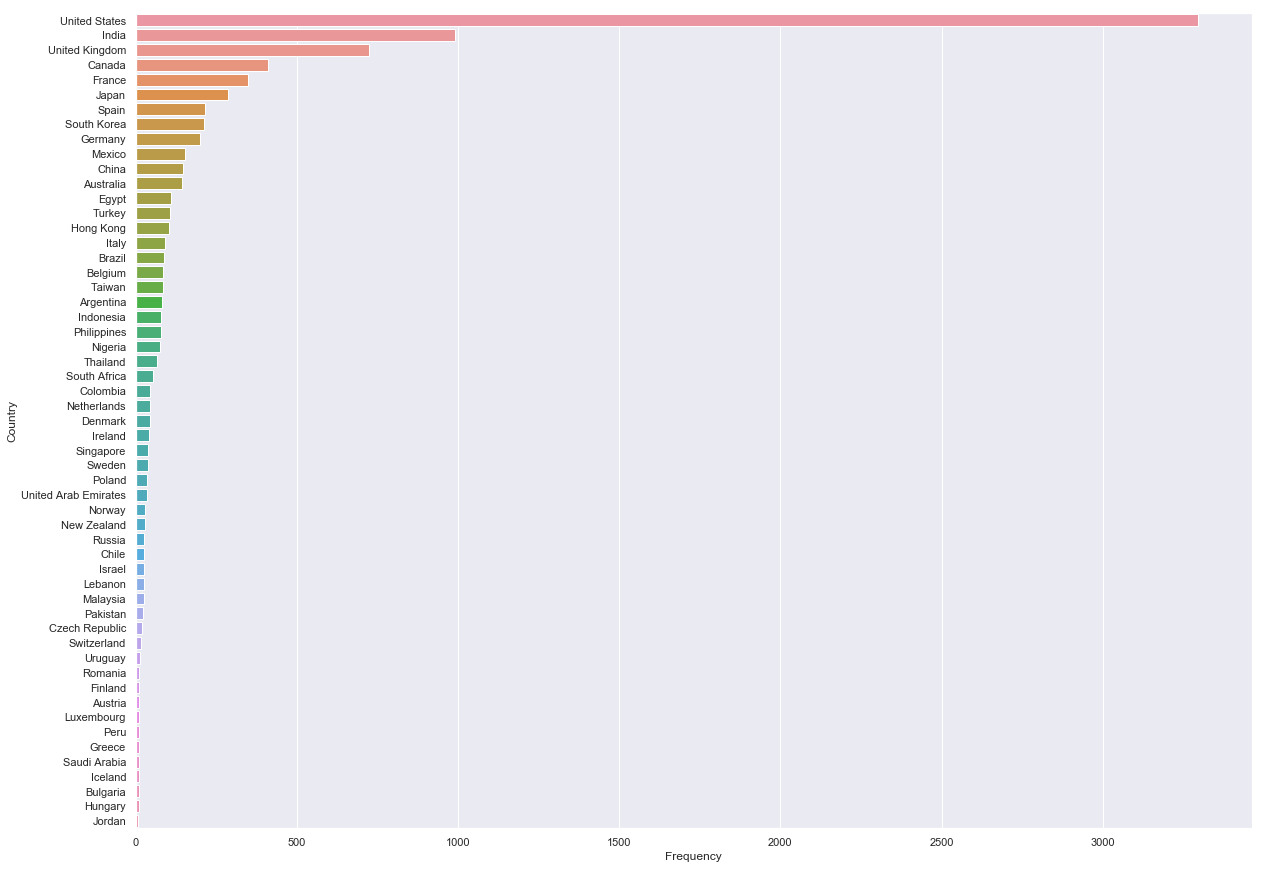

In [11]:
list_of_entries_country = get_list("country")
country_freq = get_freq_list_of(list_of_entries_country, "Country")

display(country_freq.head(55))
draw_barplot("Country", country_freq.head(55))

# Co-producers for a Country

In [12]:
def increment_country_partners(country, entry, co_prod_matrix):
    country_index = countries.index(country)
    for i in entry:
        if countries.index(i) == country_index:
            continue
        else:
            co_prod_matrix[country_index][countries.index(i)] += 1

        
def list_co_countries_for(country_name):
    temp_list_country = []
    temp_list_freq = []
    for i, freq in enumerate(co_prod_matrix[countries.index(country_name),:]):
        if freq == 0:
            continue
        else:
            temp_list_country.append(countries[i])
            temp_list_freq.append(int(freq))
            
    df = pd.DataFrame({"Country": temp_list_country, "Number of times": temp_list_freq})
    df = df.sort_values(by = ['Number of times'], ascending = False)
    print("Co-producers for", country_name)
    return df


def co_divide_and_append(curr_entry, position, list_of_entries, co_prod_arr):
    temp_arr = []
    arr_of_countries = curr_entry.split(",")
    for i, country in enumerate(arr_of_countries):
        temp_arr.append(country.strip())
    co_prod_arr.append(temp_arr)

        

def get_co_countries_entries():
    co_prod_arr = []
    list_of_country_entries = list(data.dropna(subset=['country']).country)

    for index, curr_entry in enumerate(list_of_country_entries):
        if len(curr_entry.split(",")) == 1:
            continue
        else:
            co_divide_and_append(curr_entry, index, list_of_country_entries, co_prod_arr)
    return co_prod_arr

In [13]:
countries = list(country_freq.Country)
number_of_countries = len(country_freq.Country)
co_prod_matrix = np.zeros([number_of_countries,number_of_countries])
co_prod_arr = get_co_countries_entries()

for entry in co_prod_arr:
    if '' in entry:
        if len(entry) <= 2:
            None
        else:
            entry.remove('')
            for country in entry:
                increment_country_partners(country, entry, co_prod_matrix)
    else:
        for country in entry:
            increment_country_partners(country, entry, co_prod_matrix)

display(list_co_countries_for("Turkey"))

Co-producers for Turkey


,Country,Number of times
0,United States,2
1,India,2
2,France,1
3,South Korea,1
4,Germany,1
5,Italy,1
6,Poland,1
7,Azerbaijan,1


In [14]:
'''
fig, ax = plt.subplots()
im = ax.imshow(co_prod_matrix)
fig.set_size_inches(50, 50)

ax.set_xticks(np.arange(len(countries)))
ax.set_yticks(np.arange(len(countries)))

ax.set_xticklabels(countries)
ax.set_yticklabels(countries)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(countries)):
    for j in range(len(countries)):
        text = ax.text(j, i, int(co_prod_matrix[i, j]),
                       ha="center", va="center", color="w")
ax.set_title("Co-production")
fig.tight_layout()
plt.show()
'''

'\nfig, ax = plt.subplots()\nim = ax.imshow(co_prod_matrix)\nfig.set_size_inches(50, 50)\n\nax.set_xticks(np.arange(len(countries)))\nax.set_yticks(np.arange(len(countries)))\n\nax.set_xticklabels(countries)\nax.set_yticklabels(countries)\n\nplt.setp(ax.get_xticklabels(), rotation=45, ha="right",\n         rotation_mode="anchor")\n\nfor i in range(len(countries)):\n    for j in range(len(countries)):\n        text = ax.text(j, i, int(co_prod_matrix[i, j]),\n                       ha="center", va="center", color="w")\nax.set_title("Co-production")\nfig.tight_layout()\nplt.show()\n'

# Year vs. Number of Production

In [15]:
data_country_year = data[["country", "date_added"]].dropna(subset=['country'])
data_country_year.reset_index(drop=True, inplace=True)

country_to_added = []
for index, row in data_country_year.iterrows():
    if len(row["country"].split(",")) == 1:
        continue
    else:
        data_country_year.drop(index, axis=0, inplace=True)
        arr_of_countries = row["country"].split(",")
        for i, country in enumerate(arr_of_countries):
            country_to_added.append([country, row.date_added])


country_to_added = pd.DataFrame(country_to_added)
country_to_added.columns =['country', 'date_added']
data_country_year = pd.concat([data_country_year, country_to_added], axis=0)
data_country_year.reset_index(drop=True, inplace=True)
data_country_year.date_added = data_country_year.date_added.str.slice(start=-4)
data_country_year = data_country_year.dropna(subset=['date_added'])

def plot_total_product_in_year_for(country_name, data_country_year):
    if country_name == "all":
        None
    else:
        data_country_year = data_country_year[data_country_year.country == country_name]
        
    unique, counts = np.unique(np.array(data_country_year.date_added), return_counts=True)
    year_freq = np.asarray((unique, counts)).T
    year_freq = np.delete(year_freq, 0,0)
    year_freq = pd.DataFrame(data=year_freq[:,:], columns=["Year", "Frequency"])
    year_freq["Frequency"] = year_freq.Frequency.astype(int)
    print(year_freq)
    print("\ntotal:", year_freq.Frequency.sum())
    sns.lineplot(data=year_freq, x="Year", y="Frequency")

    Year  Frequency
0   2009          2
1   2010          1
2   2011         15
3   2012          4
4   2013         13
5   2014         37
6   2015        108
7   2016        553
8   2017       1451
9   2018       1959
10  2019       2424
11  2020       2355
12  2021        134

total: 9056


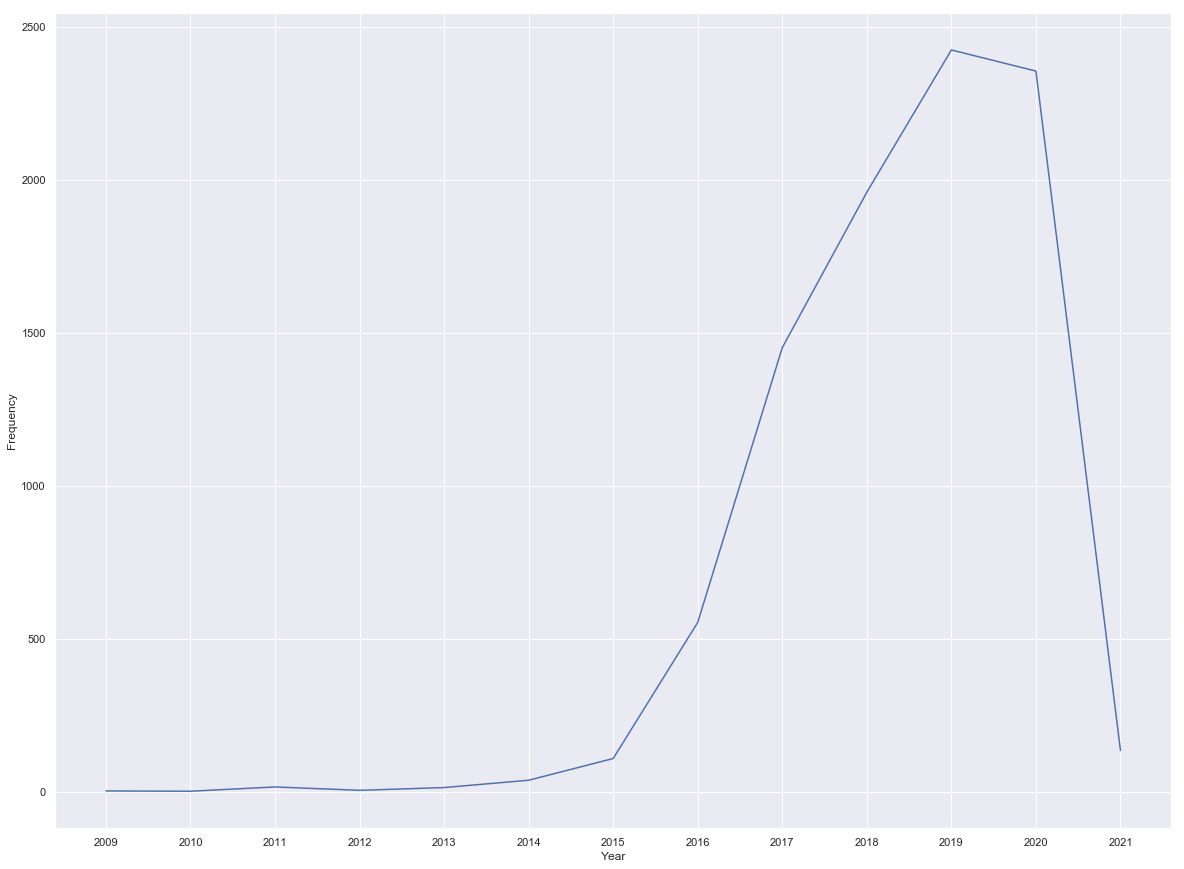

In [16]:
plot_total_product_in_year_for("all", data_country_year)

# Genre(listed-in): How many production is there per genre? (all and in country specific)

In [17]:
def get_records_for_country(attribute, country_name):
    df = data.dropna(subset=[attribute, "country"])[[attribute, "country"]]
    df = df[df.country.str.find(country_name) != -1]
    return df


def attribute_frequency_for_a_country(attribute, attribute_label, data, country_name="all", head_number=None):
    if country_name == "all":
        None
    else:
        data = get_records_for_country(attribute, country_name)

    list_of_entries_cast = get_list(attribute, data)
    cast_freq = get_freq_list_of(list_of_entries_cast, attribute_label)
    print(attribute_label, "frequency for", country_name)
    display(cast_freq.head(head_number))
    draw_barplot(attribute_label, cast_freq.head(head_number))

Genre frequency for all


,Genre,Frequency
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786
5,TV Dramas,704
6,Independent Movies,673
7,Children & Family Movies,532
8,Romantic Movies,531
9,TV Comedies,525


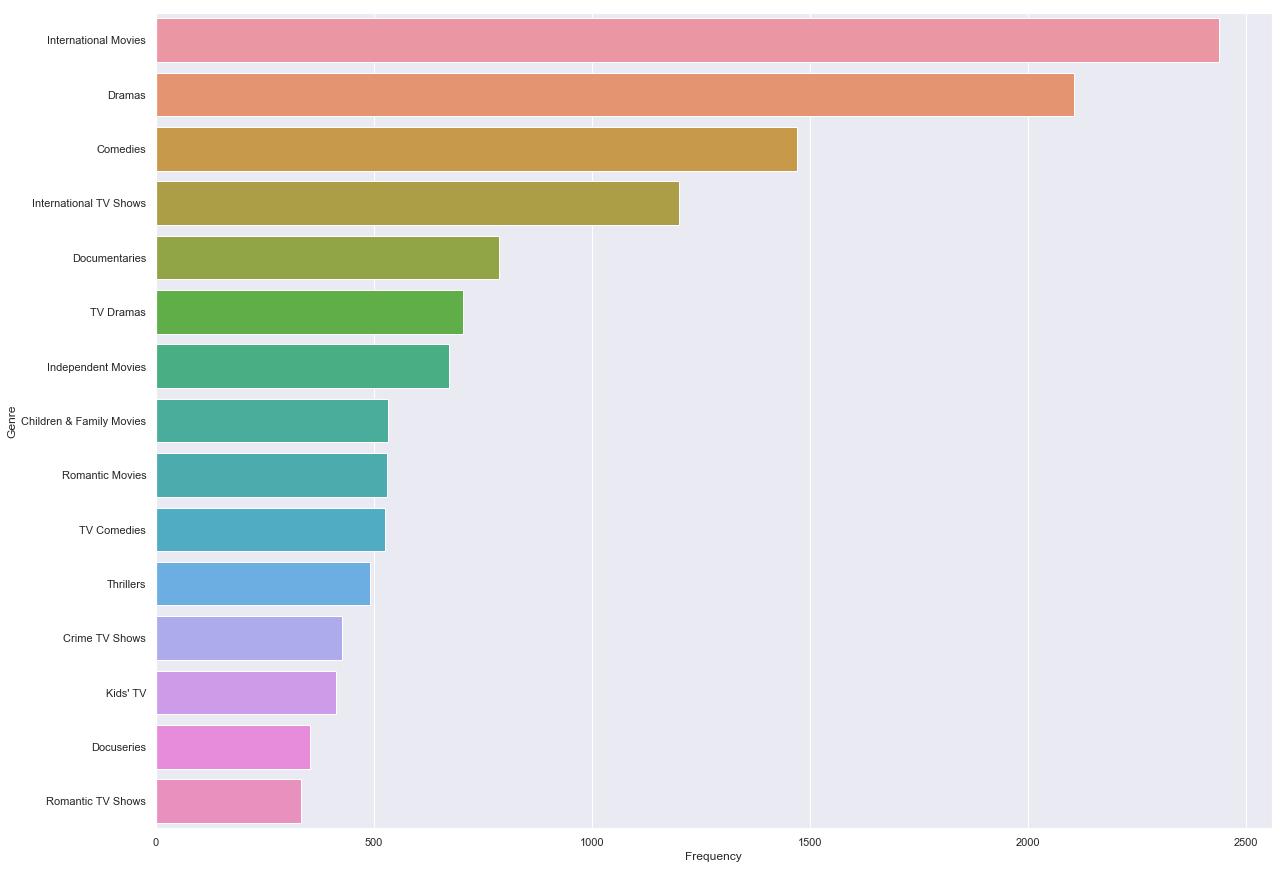

In [18]:
attribute_frequency_for_a_country("listed_in", "Genre", data, "all", 15)

# Cast: Who plays most in the shows? (all and in country specific)

Actor/Actress frequency for Turkey


,Actor/Actress,Frequency
0,Demet Akbağ,12
1,Cezmi Baskın,10
2,Büşra Pekin,7
3,Ata Demirer,7
4,Haluk Bilginer,7
5,Yılmaz Erdoğan,7
6,Salih Kalyon,7
7,Fatih Artman,7
8,Cengiz Bozkurt,7
9,Eda Ece,6


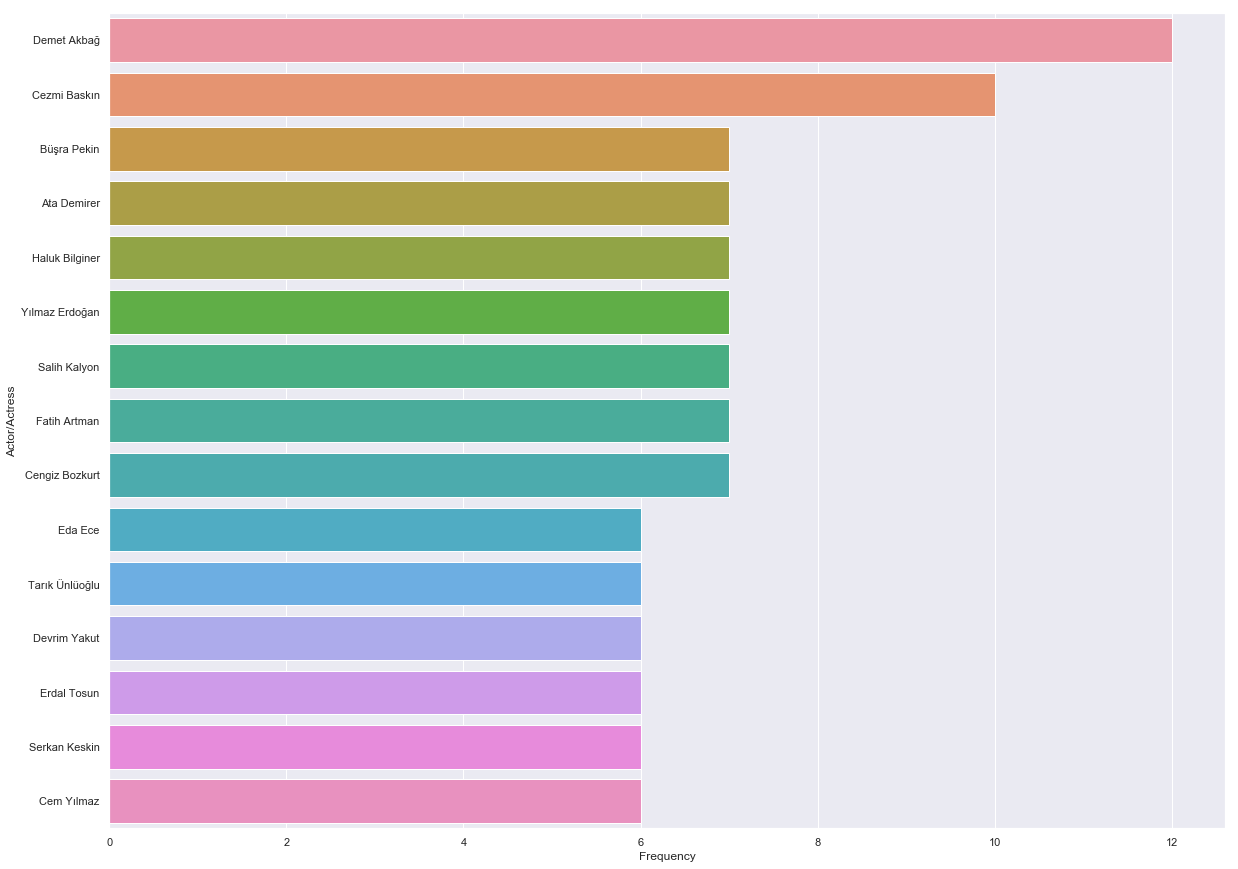

In [20]:
attribute_frequency_for_a_country("cast", "Actor/Actress", data, "Turkey", 15)

# Director: Which director has the most show? (all and in country specific)

Director frequency for Turkey


,Director,Frequency
0,Yılmaz Erdoğan,8
1,Hakan Algül,8
2,Ozan Açıktan,6
3,Kıvanç Baruönü,5
4,Hasan Karacadağ,3
5,Ömer Faruk Sorak,3
6,Sermiyan Midyat,3
7,Bedran Güzel,3
8,Burak Aksak,3
9,Cem Yılmaz,3


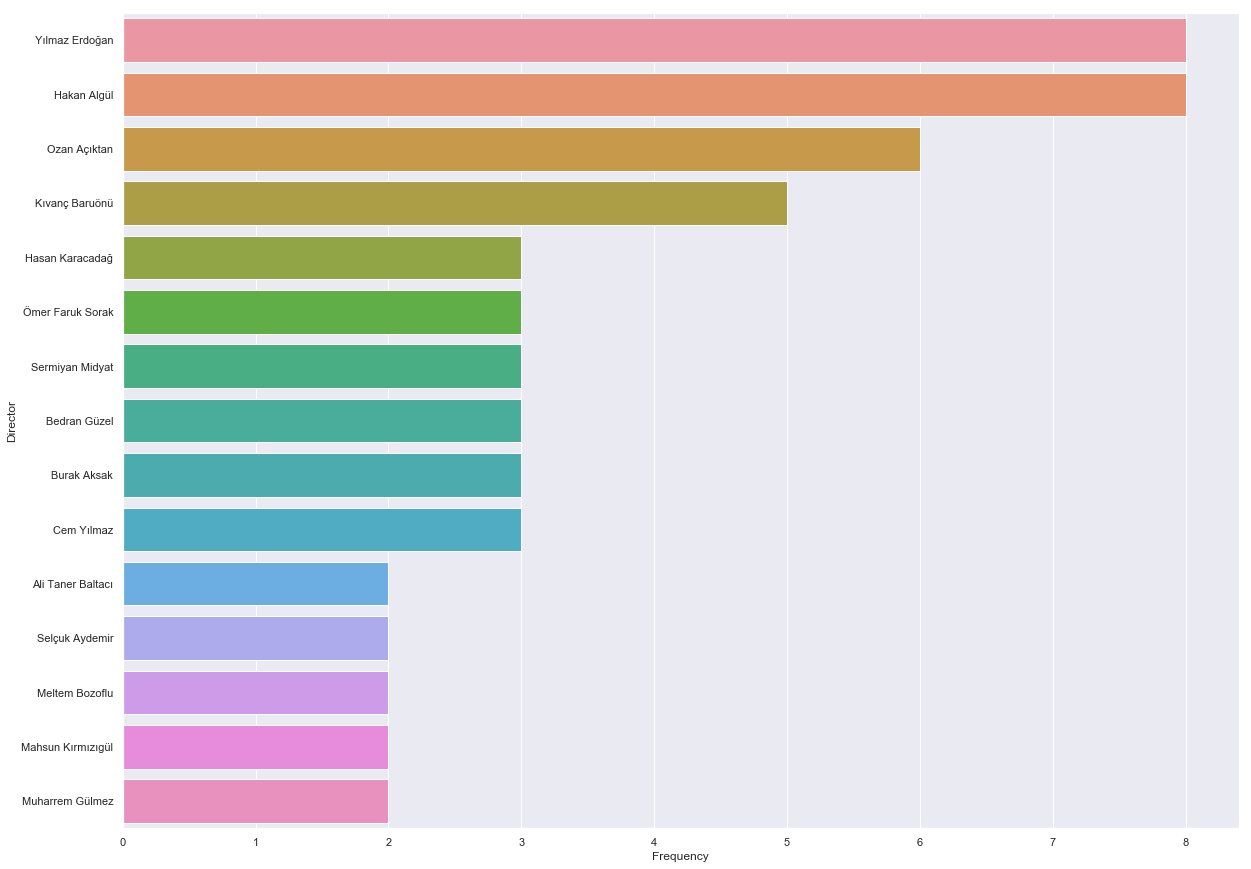

In [26]:
attribute_frequency_for_a_country("director", "Director", data, "Turkey", 15)

# Semantic Analysis: Description -> Genre